In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
json_file = './News_Category_Dataset_v3.json'
df = pd.read_json(json_file, lines=True)

df.head(5)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:
df.shape

(209527, 6)

In [4]:
df['category'].describe()

count       209527
unique          42
top       POLITICS
freq         35602
Name: category, dtype: object

In [5]:
df.category.value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [6]:
categories = ['ENTERTAINMENT','SCIENCE','POLITICS', 'PARENTING', 'TRAVEL', 'BUSINESS', 'SPORTS','ARTS','ENVIRONMENT','EDUCATION','TECH']
df_news = df[df.category.isin(categories)]

In [7]:
df_news.head(5)

,link,headline,category,short_description,authors,date
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
13,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21
17,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20
20,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",,2022-09-20
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19


In [8]:
df_news.shape

(91001, 6)

In [9]:
df_news.category.value_counts()

category
POLITICS         35602
ENTERTAINMENT    17362
TRAVEL            9900
PARENTING         8791
BUSINESS          5992
SPORTS            5077
SCIENCE           2206
TECH              2104
ARTS              1509
ENVIRONMENT       1444
EDUCATION         1014
Name: count, dtype: int64

In [10]:
df_news = df_news[['category','headline']]

In [11]:
df_news.shape

(91001, 2)

In [12]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91001 entries, 3 to 209526
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  91001 non-null  object
 1   headline  91001 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


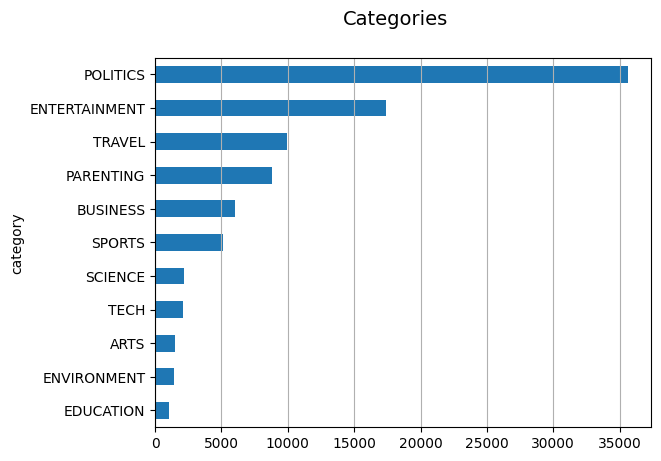

In [13]:
fig, ax = plt.subplots()
fig.suptitle("Categories", fontsize=14)
df_news["category"].reset_index().groupby("category").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [14]:
df_news.category.value_counts()/len(df_news)

category
POLITICS         0.391226
ENTERTAINMENT    0.190789
TRAVEL           0.108790
PARENTING        0.096603
BUSINESS         0.065845
SPORTS           0.055791
SCIENCE          0.024241
TECH             0.023121
ARTS             0.016582
ENVIRONMENT      0.015868
EDUCATION        0.011143
Name: count, dtype: float64

In [15]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.pipeline import Pipeline
import seaborn as sns
from time import time
import datetime

nltk.download('stopwords')
len(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=list(stopwords.words('english')))
vectorizer.fit(df_news["headline"].values)
vect = vectorizer.transform(df_news["headline"].values)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\solna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
vect.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.23430167, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [17]:
vocab = np.sort(list(vectorizer.vocabulary_.keys()))
df_tf = pd.DataFrame(vect.todense(), columns = vocab)
print(df_tf.shape)
df_tf.head()

MemoryError: Unable to allocate 25.9 GiB for an array with shape (91001, 38167) and data type float64

In [ ]:
X = df_tf.values
y = df_news["category"].values

train_data, test_data, train_target, test_target = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
print (train_data.shape, train_target.shape)
print (test_data.shape, test_target.shape)

(38164, 26946) (38164,)
(9541, 26946) (9541,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB(alpha=1.0)

mnb_model.fit(train_data, train_target)
pred_train = mnb_model.predict(train_data)
pred_test = mnb_model.predict(test_data)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(train_data, train_target)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(test_data, test_target)))


Precisión sobre los datos de entrenamiento: 83.69
Precisión sobre los datos de test: 77.53


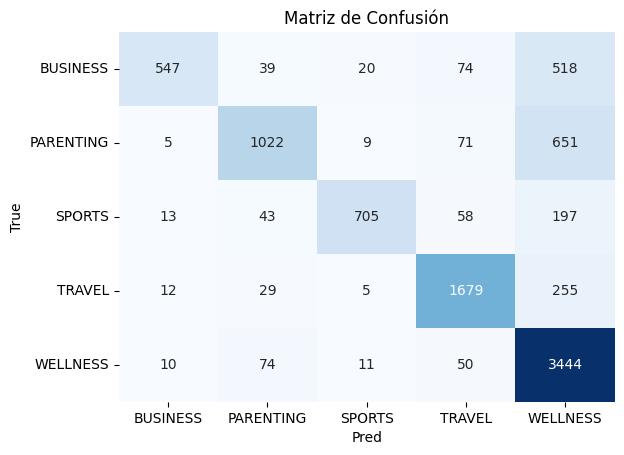

In [ ]:
classes = np.unique(test_target)
cm = confusion_matrix(test_target, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

plt.show()

In [ ]:
cr = classification_report(test_target, pred_test)
print(cr)

              precision    recall  f1-score   support

    BUSINESS       0.93      0.46      0.61      1198
   PARENTING       0.85      0.58      0.69      1758
      SPORTS       0.94      0.69      0.80      1016
      TRAVEL       0.87      0.85      0.86      1980
    WELLNESS       0.68      0.96      0.80      3589

    accuracy                           0.78      9541
   macro avg       0.85      0.71      0.75      9541
weighted avg       0.81      0.78      0.77      9541



In [ ]:
def segundos_a_minutos(segundos):
    horas = int(segundos / 60 / 60)
    segundos -= horas*60*60
    minutos = int(segundos/60)
    segundos -= minutos*60
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}"

In [ ]:
train_df, test_df = train_test_split(df_news, test_size=0.2, random_state=42, stratify=df_news["category"])
train_data = train_df["headline"]
train_target = train_df["category"]
test_data = test_df["headline"]
test_target = test_df["category"]

El tamaño de cada uno de nuestros dataset:

In [ ]:
train_data.shape, train_target.shape, test_data.shape, test_target.shape

((38164,), (38164,), (9541,), (9541,))

In [ ]:
pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ("reduce_dim", TruncatedSVD(n_components=10)),
        ("classifier", MultinomialNB()),
    ]
)

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'reduce_dim', 'classifier', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'reduce_dim__algorithm', 'reduce_dim__n_components', 'reduce_dim__n_iter', 'reduce_dim__n_oversamples', 'reduce_dim__power_iteration_normalizer', 'reduce_dim__random_state', 'reduce_dim__tol', 'classifier__alpha', 'classifier__class_prior', 'classifier__fit_prior', 'classifier__force_alpha'])

In [ ]:
nb_param_grid = {
    "reduce_dim": ["passthrough", TruncatedSVD(10), TruncatedSVD(20)],
    "tfidf__analyzer": ["word", "char"],
    "tfidf__smooth_idf": [True, False],
    "tfidf__ngram_range": [(1, 1), (1, 2),(2,2)],
    "tfidf__use_idf": [True, False],
    "tfidf__stop_words": [list(STOP_WORDS)],
    "classifier__fit_prior": [True, False],
    "classifier__alpha": [0.1, 0.5, 1, 5, 10]
}

In [ ]:
start = time()
print("Fitting started...")
search = RandomizedSearchCV(pipeline,param_distributions=nb_param_grid,verbose=1, cv=5,random_state=42)
search.fit(train_data, train_target)
end = time()
tiempo_train = segundos_a_minutos(int(end - start))
print(f"Tiempo de Entrenamiento {tiempo_train}")

Fitting started...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tiempo de Entrenamiento 00:00:43


In [ ]:
search.best_params_

{'tfidf__use_idf': False,
 'tfidf__stop_words': ['under',
  'namely',
  'and',
  'their',
  'sixty',
  'take',
  'various',
  'have',
  'seem',
  'several',
  'been',
  'had',
  'ever',
  'could',
  'becomes',
  'whatever',
  'his',
  'seeming',
  'beside',
  'amongst',
  'next',
  'therein',
  'side',
  'everything',
  'my',
  'six',
  'just',
  'yourselves',
  'both',
  "'d",
  'still',
  'against',
  'however',
  'will',
  'hers',
  'becoming',
  'those',
  'first',
  'meanwhile',
  'ours',
  'top',
  'n‘t',
  'me',
  'only',
  'hundred',
  'name',
  'other',
  'how',
  'already',
  'enough',
  "'re",
  'up',
  'also',
  'once',
  'cannot',
  'thereafter',
  'n’t',
  'the',
  'if',
  'yourself',
  'five',
  'may',
  'twenty',
  'herself',
  'its',
  'wherein',
  'hereafter',
  'every',
  'beforehand',
  'behind',
  'something',
  'her',
  '’s',
  'then',
  'them',
  'was',
  'moreover',
  'via',
  'hereby',
  'any',
  'otherwise',
  'being',
  'bottom',
  'upon',
  'besides',
  'mys

In [ ]:
model_nb = search.best_estimator_

In [ ]:
accuracy_train_nb = round(model_nb.score(train_data,train_target),5)
accuracy_test_nb = round(model_nb.score(test_data,test_target),5)

print(f'Train Accuracy : {accuracy_train_nb}')
print(f'Test Accuracy  : {accuracy_test_nb}')

Train Accuracy : 0.87148
Test Accuracy  : 0.80746


In [ ]:
y_pred = model_nb.predict(test_data)
cr = classification_report(test_target, y_pred)
print(cr)

              precision    recall  f1-score   support

    BUSINESS       0.90      0.55      0.68      1198
   PARENTING       0.83      0.67      0.74      1758
      SPORTS       0.91      0.78      0.84      1016
      TRAVEL       0.86      0.87      0.87      1980
    WELLNESS       0.74      0.93      0.83      3589

    accuracy                           0.81      9541
   macro avg       0.85      0.76      0.79      9541
weighted avg       0.82      0.81      0.80      9541



In [ ]:
compare_model_nb = pd.DataFrame({'test_data' : test_target, 
                                'prediction_data': y_pred
                              })
compare_model_nb.sample(10)

,test_data,prediction_data
53320,SPORTS,SPORTS
191128,WELLNESS,WELLNESS
137891,WELLNESS,WELLNESS
207985,PARENTING,PARENTING
193775,TRAVEL,TRAVEL
55417,SPORTS,WELLNESS
197877,TRAVEL,BUSINESS
198429,WELLNESS,WELLNESS
52148,SPORTS,WELLNESS
133954,PARENTING,WELLNESS


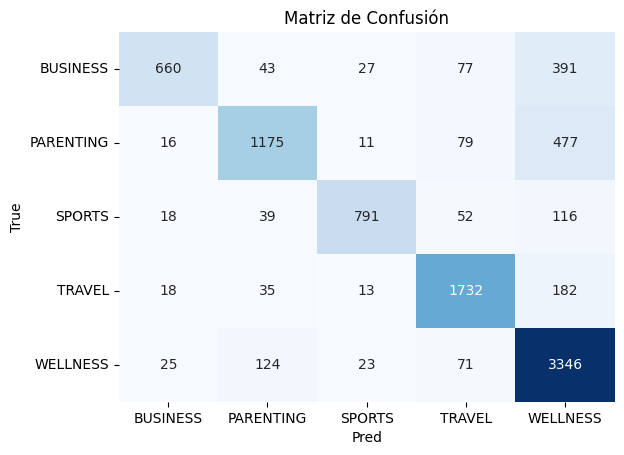

In [ ]:
classes = np.unique(test_target)
cm = confusion_matrix(test_target, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

plt.show()

In [ ]:
pipeline_CNB = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ("reduce_dim", TruncatedSVD(n_components=10)),
        ("classifier", ComplementNB())
    ]
)

In [ ]:
start = time()
print("Fitting started...")
search = RandomizedSearchCV(pipeline_CNB, 
                            param_distributions=nb_param_grid, 
                            verbose=1,
                            cv=5,
                            random_state=42)
search.fit(train_data, train_target)
end = time()
tiempo_train = segundos_a_minutos(int(end - start))
print(f"Tiempo de Entrenamiento {tiempo_train}")

Fitting started...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tiempo de Entrenamiento 00:00:44


In [ ]:
search.best_params_

{'tfidf__use_idf': True,
 'tfidf__stop_words': ['under',
  'namely',
  'and',
  'their',
  'sixty',
  'take',
  'various',
  'have',
  'seem',
  'several',
  'been',
  'had',
  'ever',
  'could',
  'becomes',
  'whatever',
  'his',
  'seeming',
  'beside',
  'amongst',
  'next',
  'therein',
  'side',
  'everything',
  'my',
  'six',
  'just',
  'yourselves',
  'both',
  "'d",
  'still',
  'against',
  'however',
  'will',
  'hers',
  'becoming',
  'those',
  'first',
  'meanwhile',
  'ours',
  'top',
  'n‘t',
  'me',
  'only',
  'hundred',
  'name',
  'other',
  'how',
  'already',
  'enough',
  "'re",
  'up',
  'also',
  'once',
  'cannot',
  'thereafter',
  'n’t',
  'the',
  'if',
  'yourself',
  'five',
  'may',
  'twenty',
  'herself',
  'its',
  'wherein',
  'hereafter',
  'every',
  'beforehand',
  'behind',
  'something',
  'her',
  '’s',
  'then',
  'them',
  'was',
  'moreover',
  'via',
  'hereby',
  'any',
  'otherwise',
  'being',
  'bottom',
  'upon',
  'besides',
  'myse

In [ ]:
model_cnb = search.best_estimator_

In [ ]:
accuracy_train_cnb = round(model_cnb.score(train_data,train_target),5)
accuracy_test_cnb = round(model_cnb.score(test_data,test_target),5)

print(f'Train Accuracy : {accuracy_train_cnb}')
print(f'Test Accuracy  : {accuracy_test_cnb}')

Train Accuracy : 0.97123
Test Accuracy  : 0.83293


In [ ]:
y_pred = model_cnb.predict(test_data)
cr = classification_report(test_target, y_pred)
print(cr)

              precision    recall  f1-score   support

    BUSINESS       0.84      0.67      0.75      1198
   PARENTING       0.81      0.72      0.77      1758
      SPORTS       0.84      0.90      0.87      1016
      TRAVEL       0.86      0.90      0.88      1980
    WELLNESS       0.82      0.88      0.85      3589

    accuracy                           0.83      9541
   macro avg       0.83      0.82      0.82      9541
weighted avg       0.83      0.83      0.83      9541



In [ ]:
compare_model_cnb = pd.DataFrame({'test_data' : test_target, 
                                'prediction_data': y_pred
                              })
compare_model_cnb.sample(10)

,test_data,prediction_data
90374,SPORTS,SPORTS
50280,BUSINESS,WELLNESS
159471,PARENTING,TRAVEL
143609,PARENTING,WELLNESS
120255,SPORTS,SPORTS
193396,WELLNESS,WELLNESS
151747,WELLNESS,WELLNESS
196986,WELLNESS,WELLNESS
170862,WELLNESS,WELLNESS
141489,WELLNESS,WELLNESS


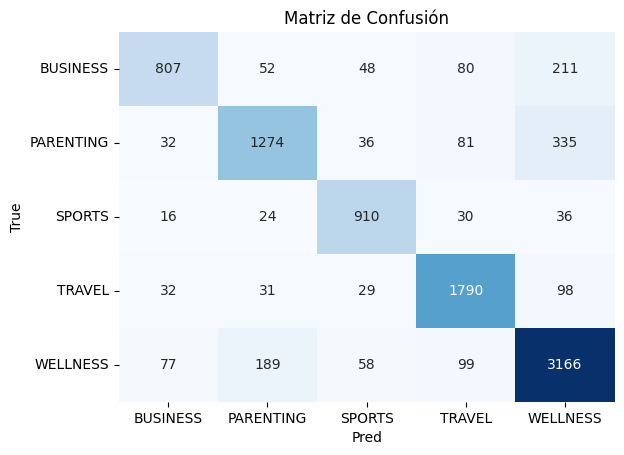

In [ ]:
classes = np.unique(test_target)
cm = confusion_matrix(test_target, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Matriz de Confusión")
plt.yticks(rotation=0)

plt.show()